In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading dataset
cd = pd.read_csv('delivery_time.csv')

In [4]:
cd

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
slr=cd.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

In [6]:
slr

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
slr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
slr.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
slr.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


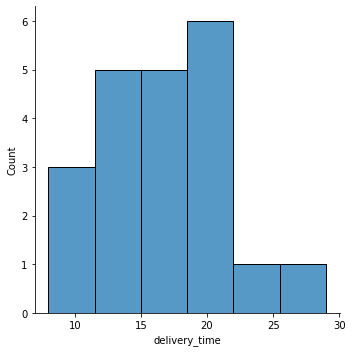

In [10]:
#creating distribution plot for column Delivery Time
sns.displot(slr['delivery_time'])
plt.show()

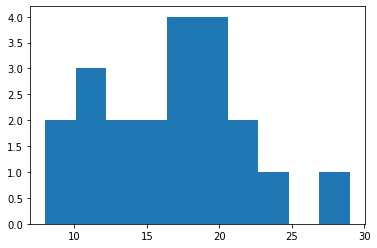

In [11]:
#creating histogram for column Delivery Time
plt.hist(slr['delivery_time'])
plt.show()

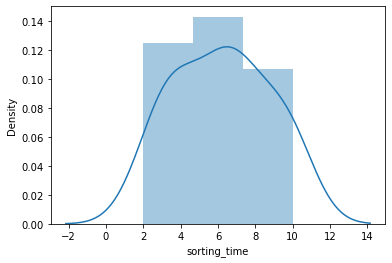

In [12]:
#creating distribution plot for column sorting time
import warnings
warnings.filterwarnings('ignore')
sns.distplot(slr['sorting_time'])
plt.show()

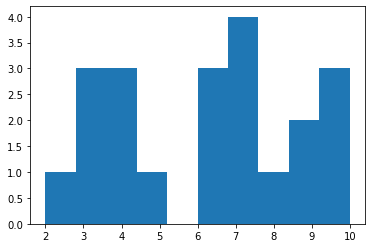

In [13]:
#creating hsitogram for column sorting time
plt.hist(slr['sorting_time'])
plt.show()

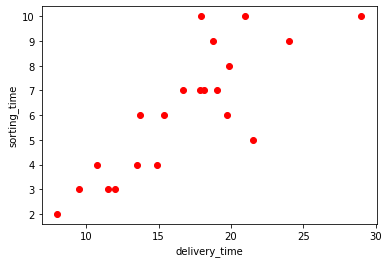

In [14]:
plt.plot(slr['delivery_time'],slr['sorting_time'],'ro')
plt.xlabel('delivery_time')
plt.ylabel('sorting_time')
plt.show()

In [15]:
#linear Transformation
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=slr).fit()

In [16]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        08:32:10   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#it is used for displaying the errors 
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [29]:

model.resid_pearson

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [20]:
pred=model.predict(slr.sorting_time)

In [21]:
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [24]:
rmse_linear=np.sqrt(np.mean((np.array(slr['delivery_time'])-np.array(pred))**2))

In [25]:
rmse_linear

2.7916503270617654

In [26]:
#log Transformation
import statsmodels.formula.api as smf
model2=smf.ols('delivery_time~np.log(sorting_time)',data=slr).fit()

In [27]:
model2.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [28]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           2.64e-06
Time:                        08:34:41   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
pred2=model2.predict(pd.DataFrame(slr['sorting_time']))

In [31]:
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [32]:
rmse_log=np.sqrt(np.mean((np.array(slr['delivery_time'])-np.array(pred2))**2))

In [33]:
rmse_log

2.733171476682066

In [34]:
#Exponential Transformation 
import statsmodels.formula.api as smf
model3=smf.ols('np.log(delivery_time)~sorting_time',data=slr).fit()

In [35]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Tue, 18 Apr 2023   Prob (F-statistic):           1.59e-06
Time:                           08:35:50   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
model3.params

Intercept       2.121372
sorting_time    0.105552
dtype: float64

In [37]:
pred3=model3.predict(pd.DataFrame(slr['sorting_time']))

In [38]:
pred3

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [66]:
rmse_exponential=np.sqrt(np.mean(np.array(slr['delivery_time'])-np.array(pred3)**2))

In [67]:
rmse_exponential

3.0038221425742866

In [47]:
#creating new column
slr['sorting_time_sq']=slr.sorting_time*slr.sorting_time

In [48]:
slr

,delivery_time,sorting_time,sorting_time_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [49]:
#Square Transformation 
import statsmodels.formula.api as smf
model4=smf.ols('np.log(delivery_time)~sorting_time+sorting_time_sq',data=slr).fit()

In [50]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Tue, 18 Apr 2023   Prob (F-statistic):           2.20e-06
Time:                           09:01:35   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6997      0.228      7.441      0.000       1.220       2.180
sorting_time        0.2659      0.080      3.315      0.004       0.097       0.434
sorting_time_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
model4.params

Intercept          1.699704
sorting_time       0.265922
sorting_time_sq   -0.012841
dtype: float64

In [52]:
model4.resid

0    -0.030341
1     0.044747
2     0.150179
3     0.125141
4     0.292433
5    -0.101859
6     0.012471
7    -0.130613
8    -0.190063
9    -0.121719
10   -0.018085
11   -0.183037
12   -0.117758
13    0.060442
14    0.105499
15    0.142076
16   -0.211935
17   -0.035504
18   -0.100744
19   -0.051086
20    0.359754
dtype: float64

In [53]:
model4.resid_pearson

array([-0.18653701,  0.27510944,  0.92331151,  0.76937448,  1.79789238,
       -0.62623272,  0.0766711 , -0.80301506, -1.16851536, -0.74833548,
       -0.11118848, -1.12531927, -0.72398172,  0.37160353,  0.64861345,
        0.8734897 , -1.3029903 , -0.21828016, -0.61938087, -0.31407821,
        2.21178906])

In [57]:
pred4=model4.predict(slr)
pred4=np.exp(pred4)# as we have used log(AT) in preparing model so we need to convert it back

In [58]:
pred4

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [64]:
rmse_sqrt=np.sqrt(np.mean((np.array(slr['delivery_time'])-np.array(pred4))**2))

In [65]:
rmse_sqrt

2.799041988740925

In [69]:
SLR={"Model":pd.Series(["rmse_linear","rmse_log","rmse_exponential","rmse_sqrt"]),
     "RMSE_Values":pd.Series([rmse_linear,rmse_log,rmse_exponential,rmse_sqrt]),
     "RSquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared])}
table=pd.DataFrame(SLR)
table

,Model,RMSE_Values,RSquare
0,rmse_linear,2.791650,0.682271
1,rmse_log,2.733171,0.695443
2,rmse_exponential,3.003822,0.710948
3,rmse_sqrt,2.799042,0.764867


In [ ]:
#We got best rmse value and r2 value in square transformation when compared with others